# Explicación del concepto de árbol de decisión

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  


---

## Descripción

Este notebook contiene una explicación básica del concepto de árbol de decisión y el de entropía. Debe usarse como un complemento del notebook que muestra el uso del árbol de decisión para construir un modelo de clasificación.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

#¿Qué es un árbol de decisión?

Es un modelo de clasificación (o de regresión) que simula una serie de *decisiones secuenciales* para llegar a una conclusión.

Imita el razonamiento humano: en lugar de usar ecuaciones complejas, elige **preguntas simples** en cada nodo.

#¿Cómo funciona un árbol de decisión?

1. Comienza con todos los datos en la raíz del árbol.
2. Busca la **mejor pregunta** para dividir los datos.
3. Divide los datos en ramas según la respuesta (si o no).
4. Repite el proceso en cada subconjunto hasta que cada grupo esté "puro" (una sola clase).

#¿Cómo se decide la *"mejor pregunta"*?

🧠 Usando la entropía, un concepto de la teoría de la información

# Entropía

✅ Cantidad de desorden o incertidumbre ✅

Si un conjunto de datos tiene muchas clases mezcladas se dice que tiene **ALTA ENTROPÍA**.

Si, por el contrario, todas las instancias pertenecen a la misma clase entonces tiene **entropía cero** (es puro).

Su fórmula matemática es:

$H(S)=-\sum_{i=1}^{n}{p_i}\log_2 p_i$

Donde:

+ H(S) es la entropia del conjunto S
+ $p_i$ es la proporción de elementos de la clase   $\textit{i}$

# Ejemplo simple

Se tiene los datos de un grupo de estudiantes; para cada uno de ellos se sabe si estudió o no para un examen y si aprobó o no.

<table>
  <tr>
    <th>Estudia</th>
    <th>Aprueba</th>
  </tr>
  <tr>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>No</td>
    <td>No</td>
  </tr>
  <tr>
    <td>No</td>
    <td>Sí</td>
  </tr>  
</table>

Se tienen dos clases: aprueba = Sì y aprueba = No

+ Total de ejemplos = 4
+ Aprueba = Sí es 3/4
+ Aprueba = No es 1/4

Al calcular la entropía se tiene:

$H=-(\frac{3}{4}log_2(\frac{3}{4}+\frac{1}{4}*log_2(\frac{1}{4})))$

Lo anterior, resulta en un valor aproximado de 0.81

#Uso de la entropía

El algoritmo intentará dividir el conjunto en dos ramas. Para cada rama calcula su etropía y evalúa la "ganancia de información".

Y ¿qué es la ganancia de información?

$Ganancia=H_{original}-(promedio de entropía de las ramas)$

Elige la división que más reduzca la entropía,e s decir, la que más ORDEN genera.

# Ejemplo en Python

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from math import log2
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [7]:
# Proporciones de las clases
p_si = 3/4
p_no = 1/4

# Entropia
entropia = (-p_si * log2(p_si)) - (p_no * log2(p_no))
print(f"Entropia: {entropia}")

Entropia: 0.8112781244591328


In [9]:
# Crea el DataFrame
data = pd.DataFrame({
    'Edad': ['<30', '<30', '30-40', '>40', '>40', '30-40'],
    'Tiene_dinero': ['No', 'Sí', 'Sí', 'Sí', 'No', 'No'],
    'Estudia_afuera': ['No', 'Sí', 'Sí', 'No', 'No', 'Sí']
})
data

,Edad,Tiene_dinero,Estudia_afuera
0,<30,No,No
1,<30,Sí,Sí
2,30-40,Sí,Sí
3,>40,Sí,No
4,>40,No,No
5,30-40,No,Sí


In [10]:
# Codificación de las variables categóricas
encoder = LabelEncoder()
data_encoded = data.apply(encoder.fit_transform)

In [13]:
data_encoded

,Edad,Tiene_dinero,Estudia_afuera
0,1,0,0
1,1,1,1
2,0,1,1
3,2,1,0
4,2,0,0
5,0,0,1


In [16]:
# Variables predictoras y objetivo
X = data_encoded[['Edad', 'Tiene_dinero']]
y = data_encoded['Estudia_afuera']

# Modelo
modelo = DecisionTreeClassifier(criterion='entropy')  # usa entropía
modelo.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

🔴 **Este ejemplo es sólo para explicar el funcionamiento del algoritmo. Esa es la razón por la cual se omite la división de los datos en train y test.**

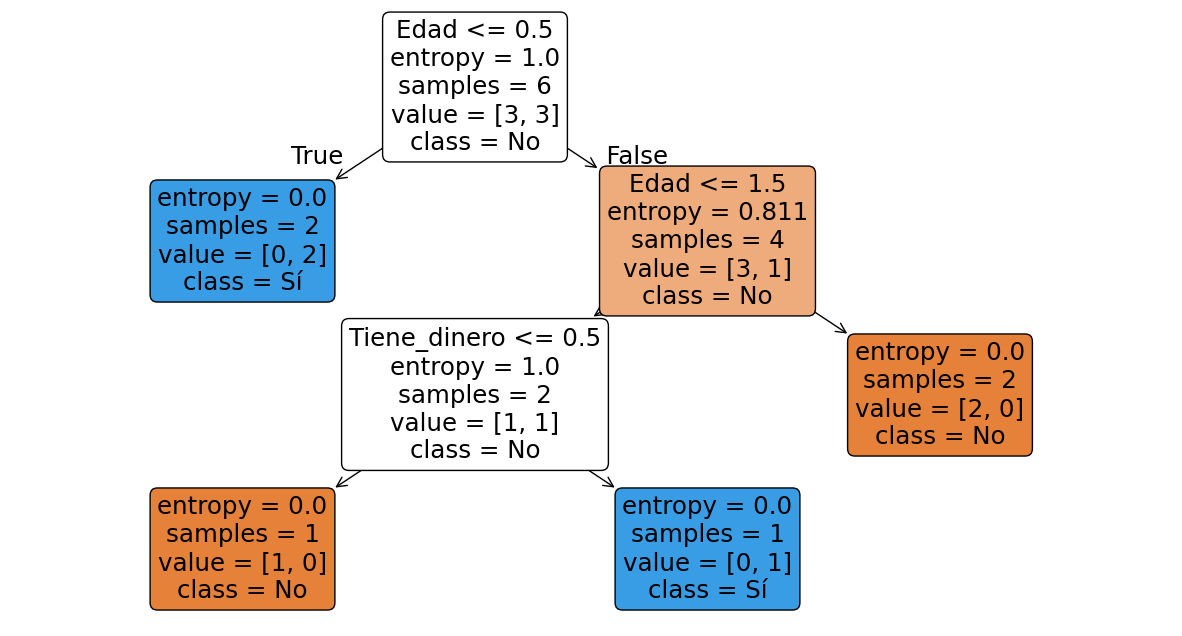

In [18]:
plt.figure(figsize=(15,8))
plot_tree(modelo,
          feature_names=['Edad', 'Tiene_dinero'],
          class_names=['No', 'Sí'],
          filled=True,
          rounded=True)
plt.show()


✅ Los nodos azules son de la clase positiva.

✅ Los nodos naranjas son de la clase negativa.

✅ La intensidad del color indica la "pureza" del nodo. A mayor intensidad son más puros, es decir, su entropía es cero o más cercana a cero.

In [19]:
# Arbol como "texto"
print(export_text(modelo, feature_names=list(X.columns)))

|--- Edad <= 0.50
|   |--- class: 1
|--- Edad >  0.50
|   |--- Edad <= 1.50
|   |   |--- Tiene_dinero <= 0.50
|   |   |   |--- class: 0
|   |   |--- Tiene_dinero >  0.50
|   |   |   |--- class: 1
|   |--- Edad >  1.50
|   |   |--- class: 0



# ¿Cómo lo hizo el algoritmo?

## Paso 1 - Calcula la entropía total

Se tienen 6 ejemplos:

+ 3 veces Sí
+ 3 veces No

$H=-(\frac{3}{6}log_2(\frac{3}{6}+\frac{3}{6}*log_2(\frac{3}{6})))$

In [14]:
# Proporciones de las clases
p_si = 3/6
p_no = 3/6

# Entropia
entropia = (-p_si * log2(p_si)) - (p_no * log2(p_no))
print(f"Entropia: {entropia}")

Entropia: 1.0


## Paso 2 - Elige el atributo para dividir

Dividir por "Edad":

Edad < 30:

+ 2 ejemplos: 1 Si y 1 No -> Entropía es igual a 1

Edad 30-40:

+ 2 ejemplos: 2 Si -> Entropía es igual a 0

Edad > 40:

+ 2 ejemplos: 0 Si y 2 No -> Entropía es igual a 0

Entropía ponderada:

$\frac{2}{6}\times 1 + \frac{2}{6}\times 0 + \frac{2}{6}\times 0 = \frac{1}{3}$

Ganancia de la información:

$1 - \frac{1}{3} = \frac{2}{3}$



```
Edad?
├── <30
│   ├── Tiene dinero?
│   │   ├── Sí → Sí
│   │   └── No → No
├── 30-40 → Sí
└── >40 → No
```